In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [5]:
df = pd.read_csv('insurance (1).csv')

In [7]:
print("First few rows of the dataset:")
print(df.head())
print("\nSummary statistics of the dataset:")
print(df.describe())

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Summary statistics of the dataset:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


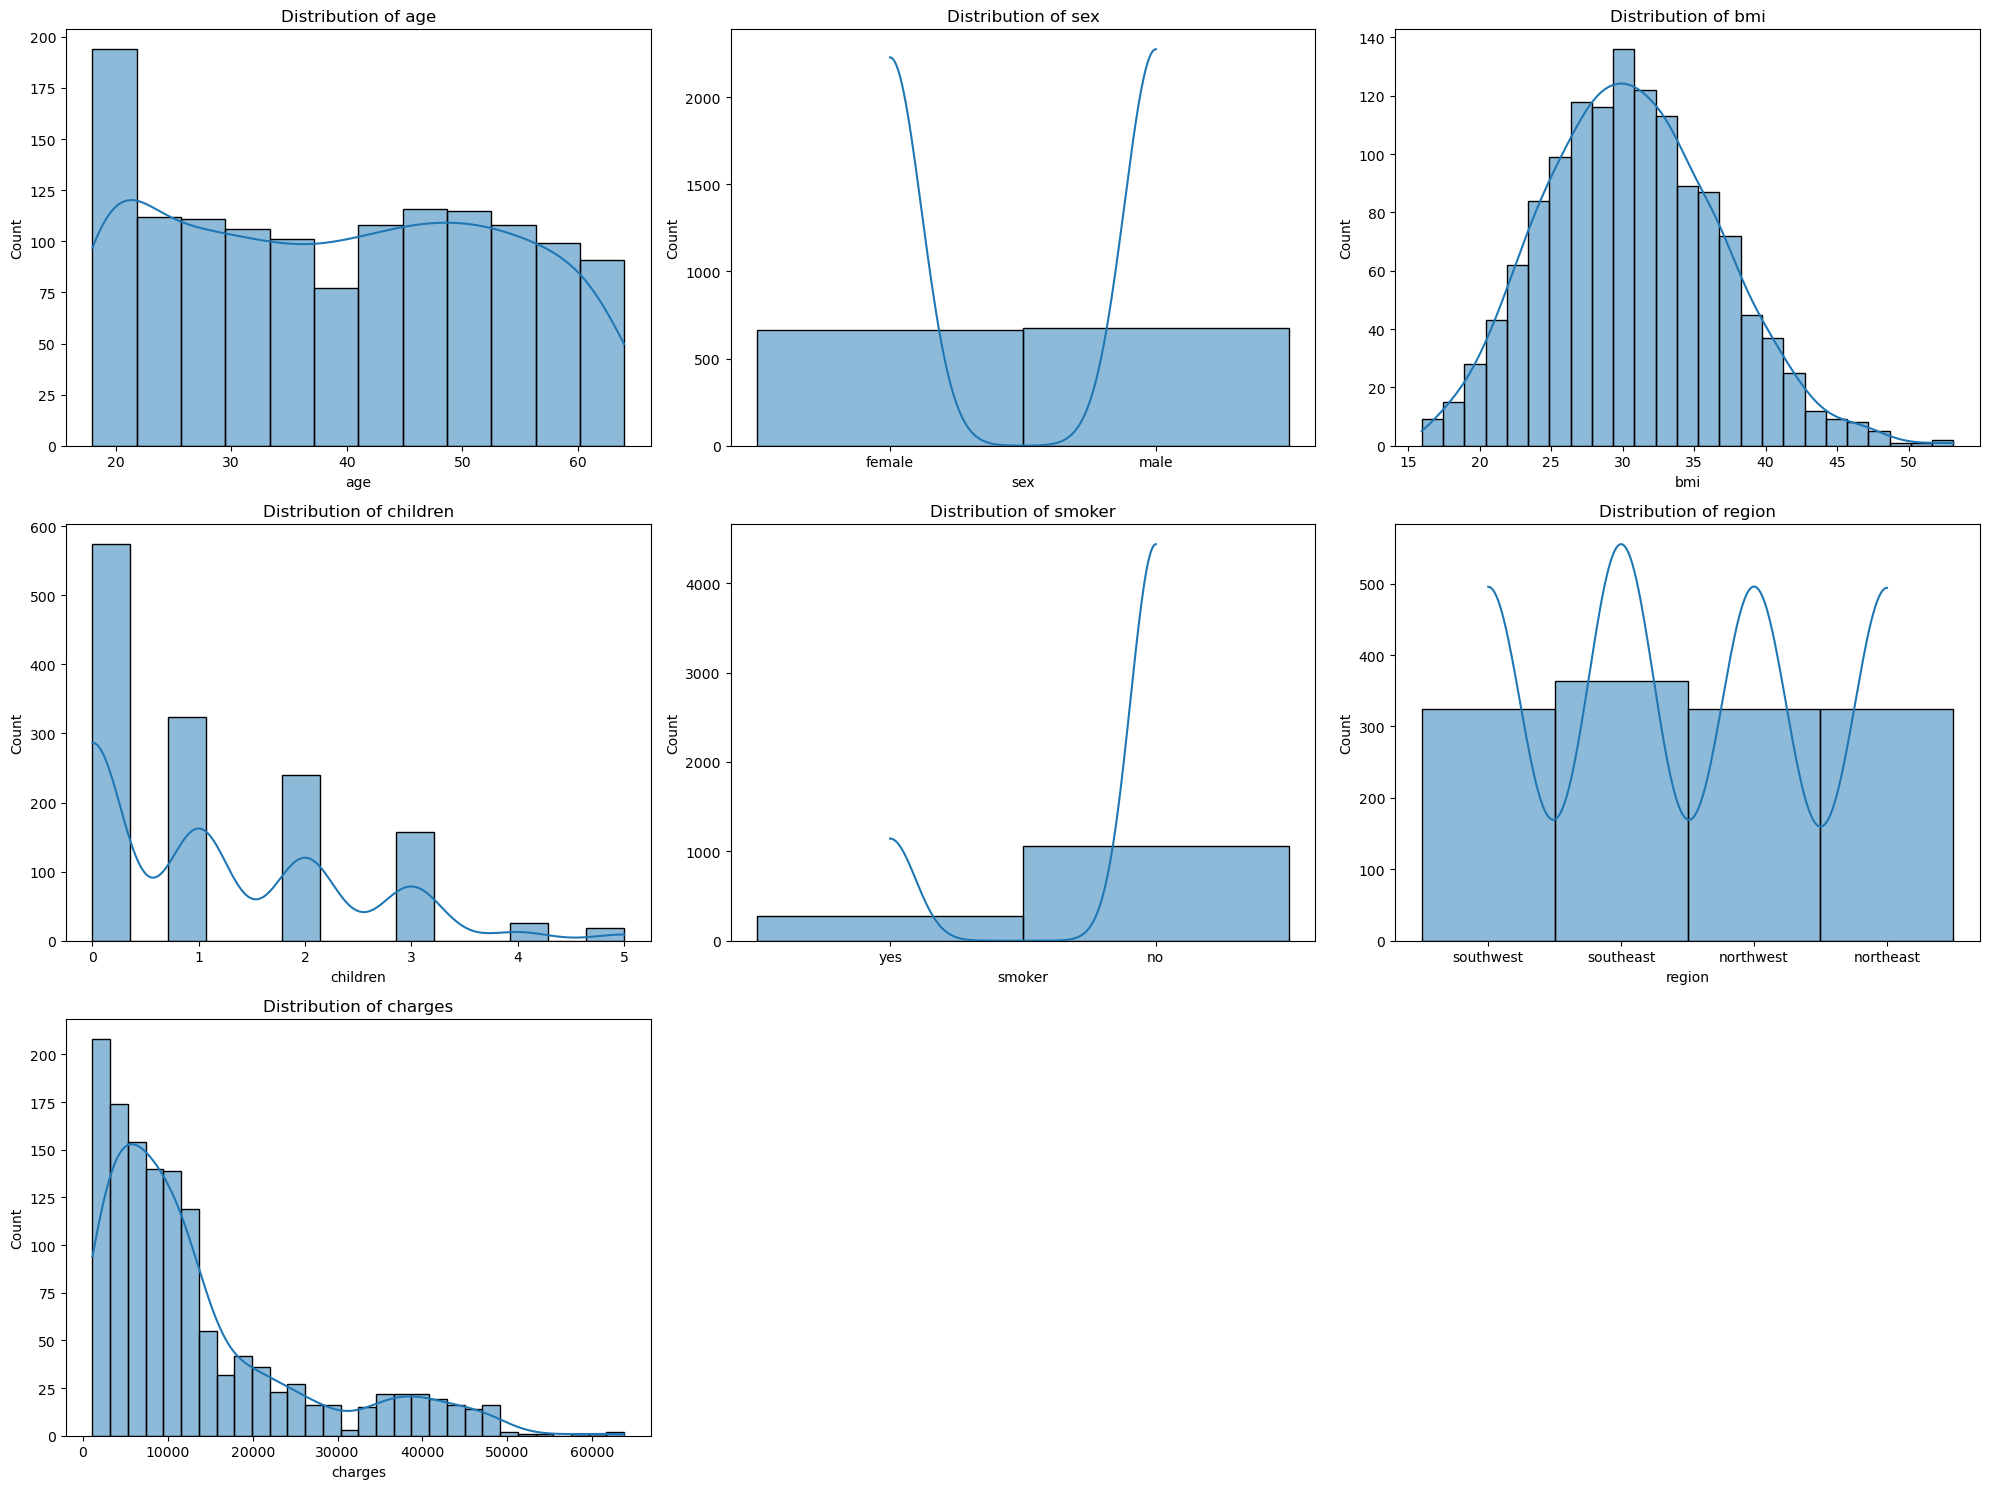

In [11]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

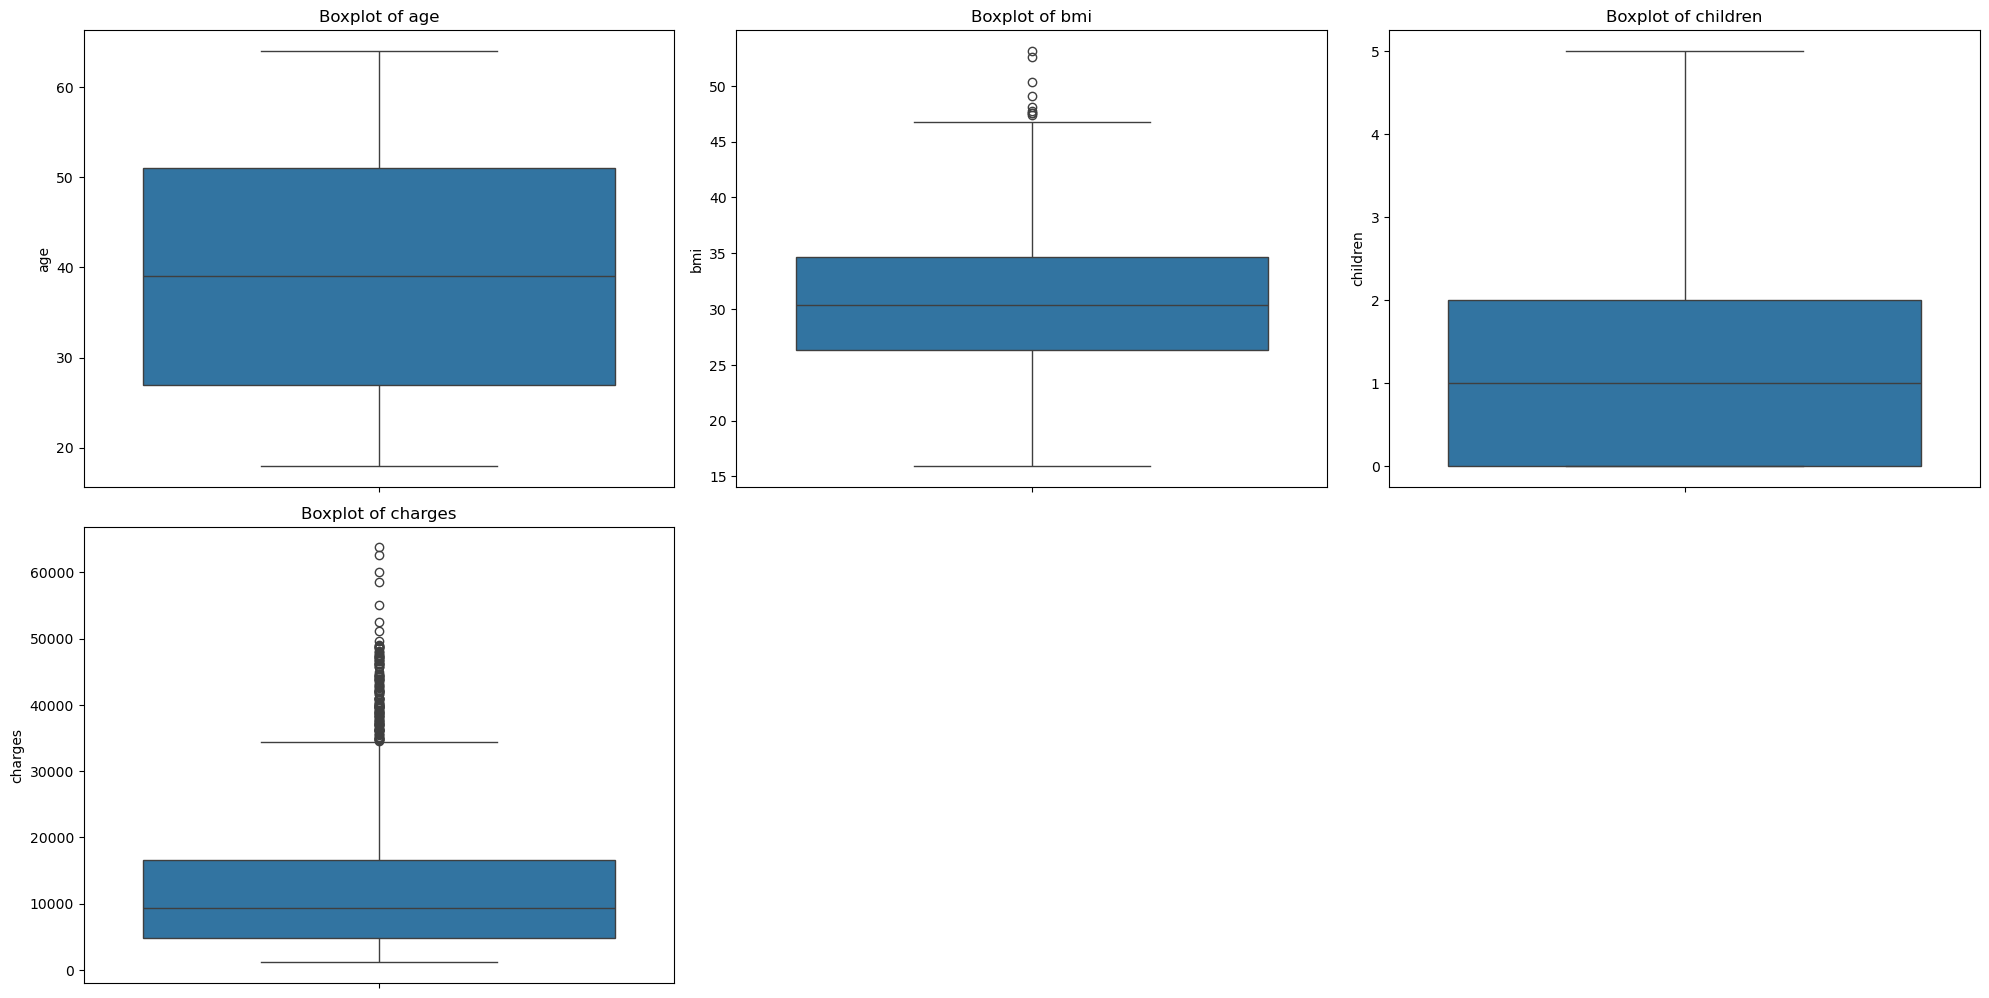

In [13]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [15]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [19]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = iso_forest.fit_predict(df.select_dtypes(include=np.number))
df_cleaned = df[df['outlier'] == 1].drop(columns='outlier')

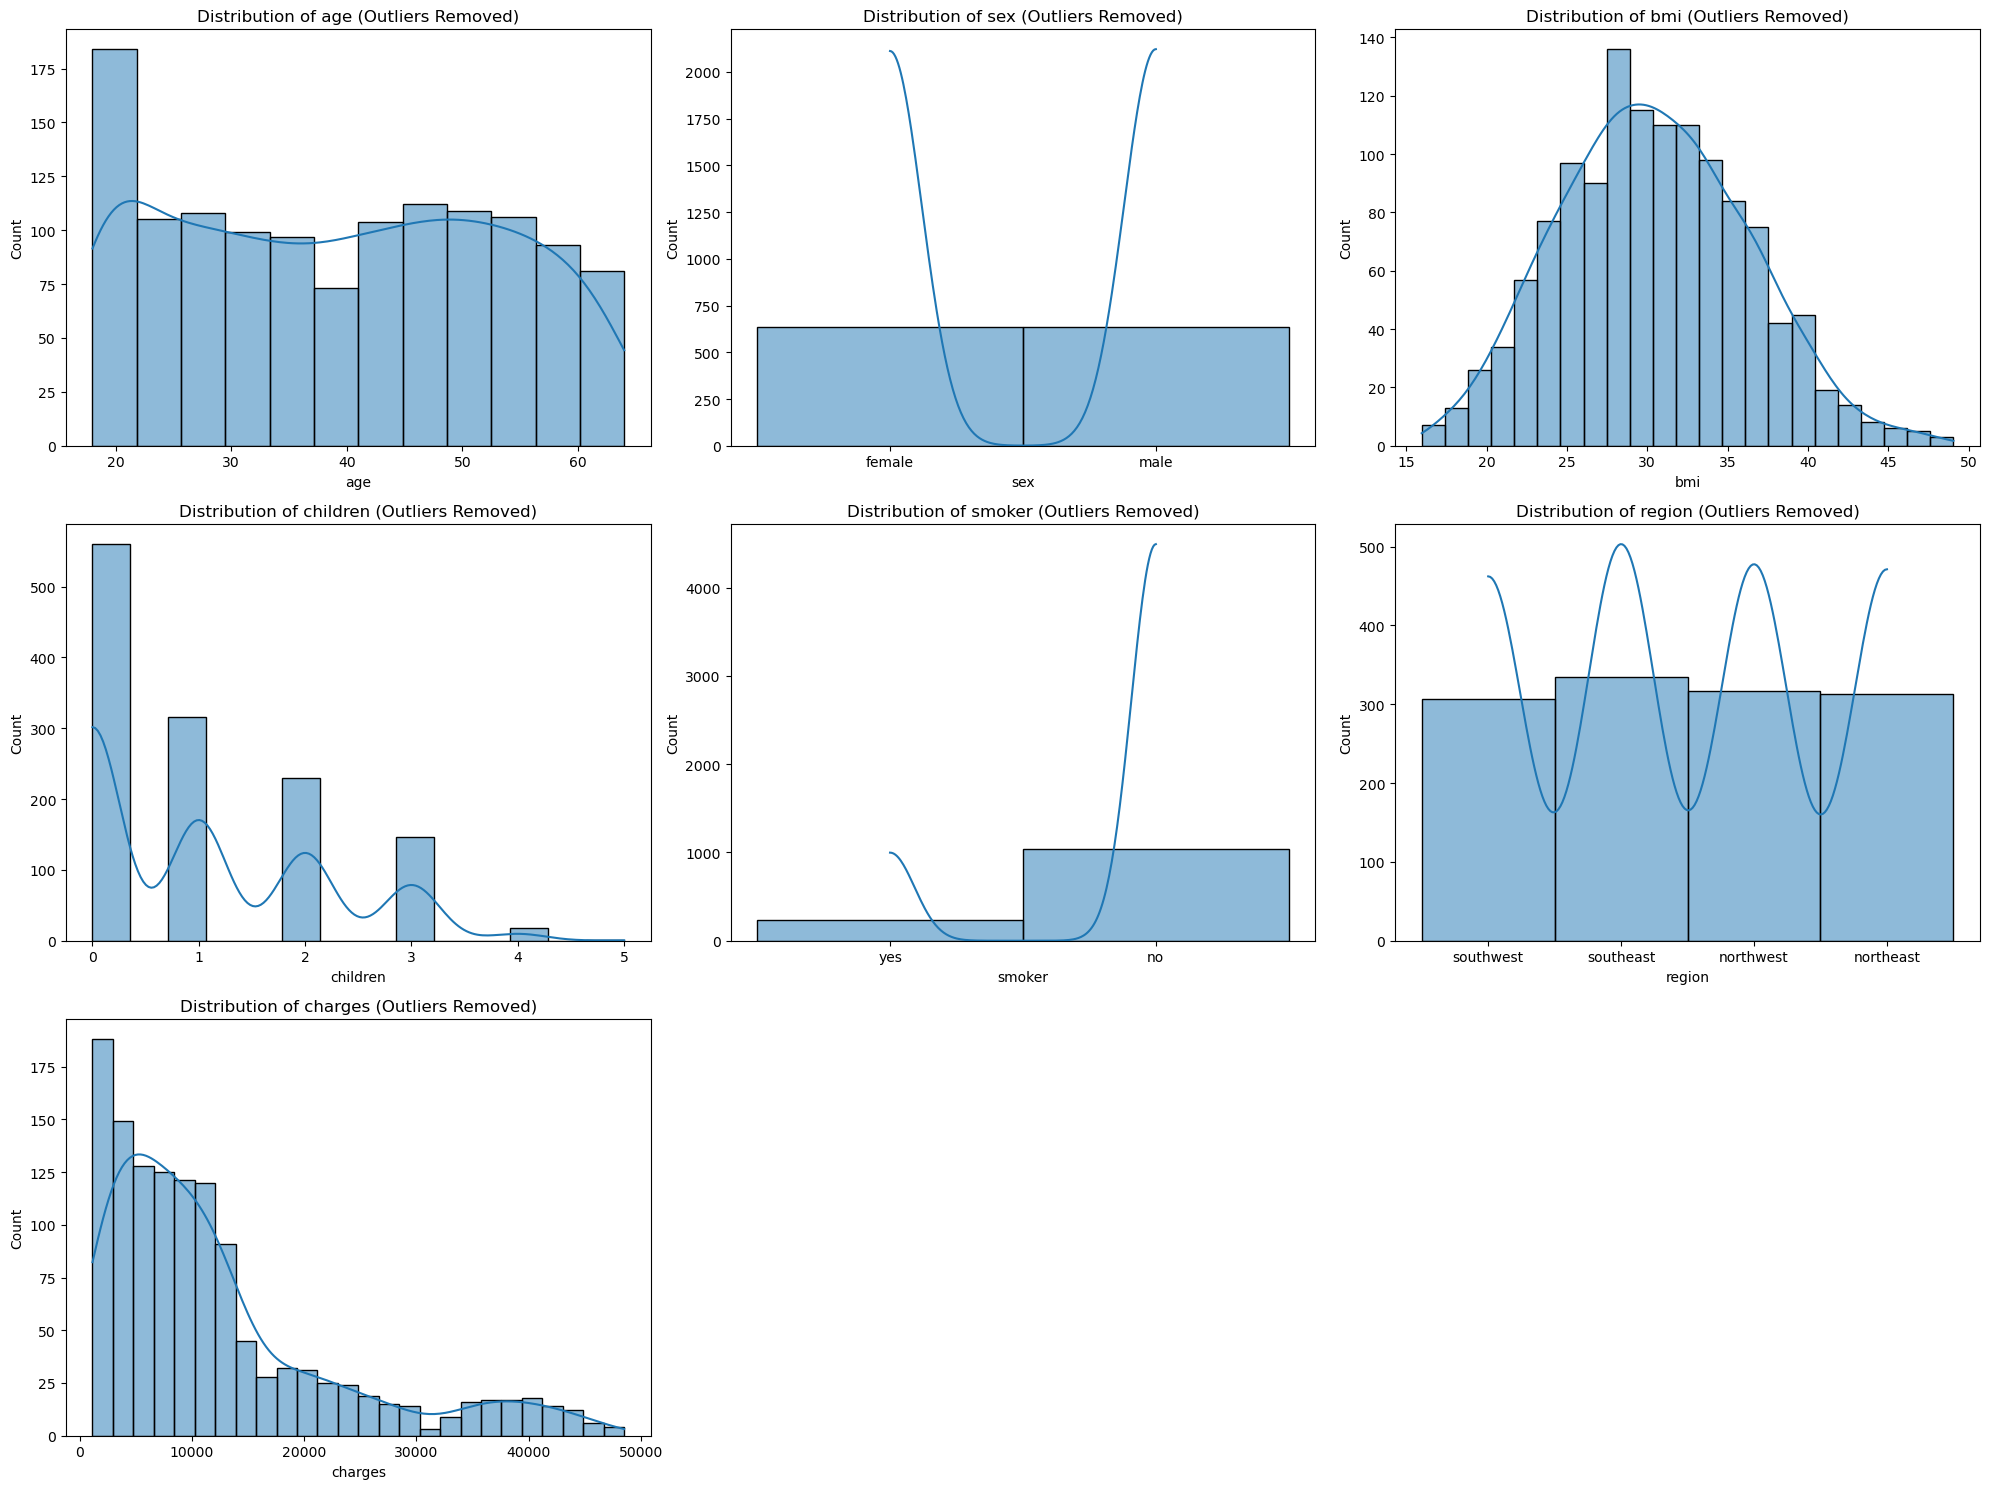

In [21]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Distribution of {column} (Outliers Removed)')
plt.tight_layout()
plt.show()

In [23]:
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

# Define the features (X) and the target variable (y)
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)


In [31]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print(f"\nModel Performance (Linear Regression):")
print(f"Mean Absolute Error (MAE): {mae_linear}")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")


Model Performance (Linear Regression):
Mean Absolute Error (MAE): 3914.084407015933
Mean Squared Error (MSE): 33744553.39444762
Root Mean Squared Error (RMSE): 5809.0062312281625
